<a href="https://colab.research.google.com/github/Ernesto-Lora/wine_prediction/blob/main/Wine_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine dataset
In this notebook we develop some approches in order to predict the origin of the wine depending on different features that has been registed.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


cls = ['Class','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',\
       'Total phenols', 'Flavanoids','Nonflavanoid phenols', 'Proanthocyanins',\
       'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

dataset = pd.read_csv('wine/wine.data', names = cls)


In [ ]:
dataset

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
# Divide data in features and target
X = dataset.iloc[:, 1:14]
y = dataset.iloc[:, 0]

In [ ]:
# Divide data into the train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


### Attempt one
Train the model with the 'raw' data

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def get_accuracy(estimator, X_val, y_val):
    y_pred1 = estimator.predict(X_val)
    print('Accuracy : {}'.format(accuracy_score(y_val, y_pred1) ))

    conf_m = confusion_matrix(y_val, y_pred1)
    print(conf_m)



In [ ]:
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)

get_accuracy(estimator = model1, X_val = X_val, y_val = y_val)

Accuracy : 1.0
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


### Attempt two

We will try, first, standarize the data and then make a dimension reduction. Finally we train the same random forest classifier

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

estimators = [('standarize', StandardScaler()),
              ('dimension_reduction', LinearDiscriminantAnalysis(n_components=2))]

pip1 = Pipeline(estimators)

pip1.fit(X_train, y_train)

model2 = RandomForestClassifier(max_depth=2, random_state=0)
model2.fit(pip1.transform(X_train), y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
get_accuracy(estimator = model2, X_val = pip1.transform(X_val),
             y_val = y_val)

Accuracy : 1.0
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


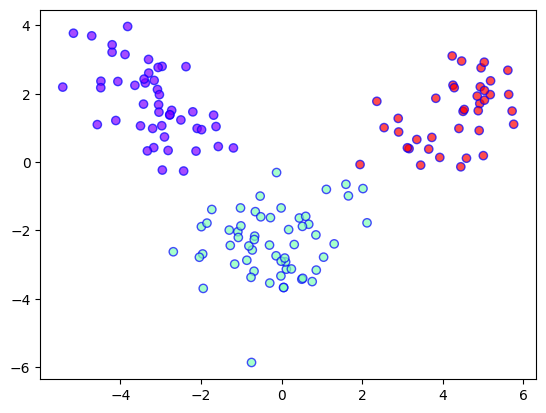

In [ ]:
#scatterplot of the dimension reduction

plt.scatter(
    pip1.transform(X_train)[:,0], pip1.transform(X_train)[:,1],
    c = y_train, cmap='rainbow', alpha=0.7,
    edgecolors='b'
)

# Discution

As we see, the models are highly accurated. This, in instance, could be because of the size of the dataset. Our dataser has only 178 samples.

Another reason could be that the distrubition of the data by class is clearly differentiated. Lets see the distributions:

In [ ]:
def histograms(data, feature = ''):
    data = data.groupby('Class')

    plt.style.use('ggplot')

    plt.title('')

    for class0, color in zip([1,2,3], ['yellow', 'brown', 'green']):

        plt.hist(data.get_group(class0)[feature], edgecolor='black',
             color=color, rwidth=0.9, alpha=0.5, label=str(class0), density = True)

    plt.legend(loc='upper right')

    plt.xlabel(feature)
    plt.ylabel('Frecuency')

    plt.show()

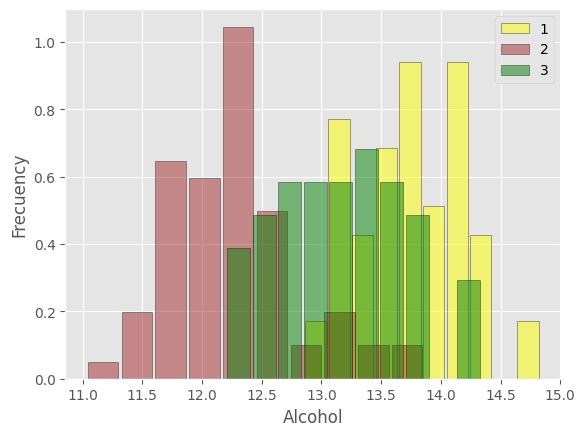

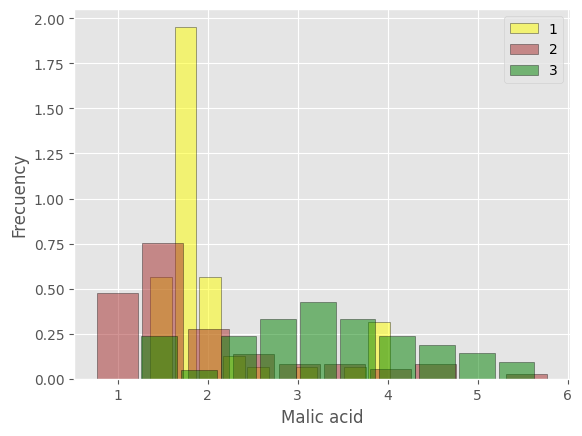

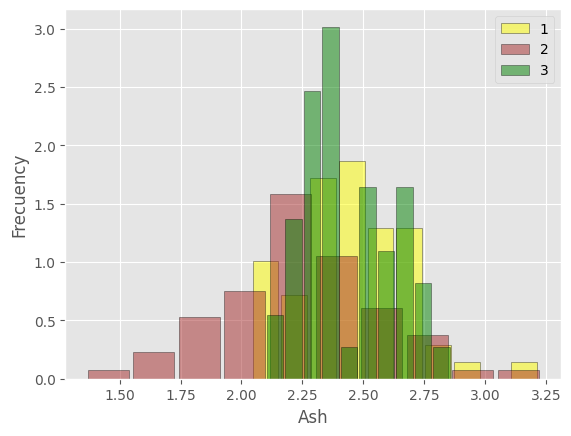

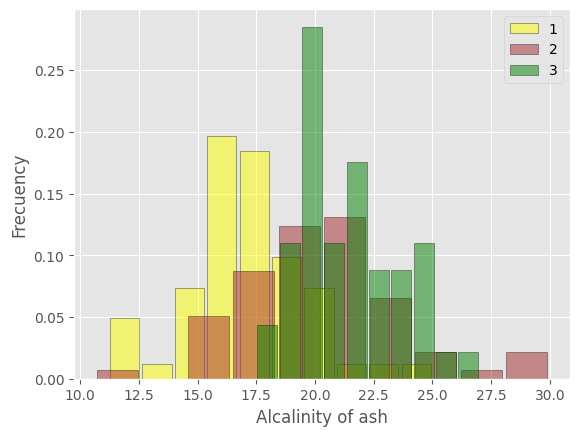

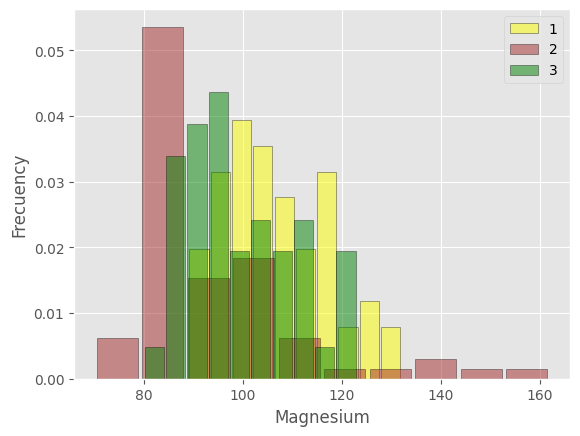

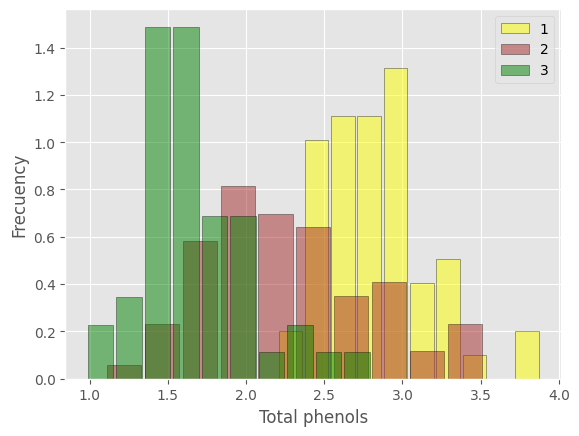

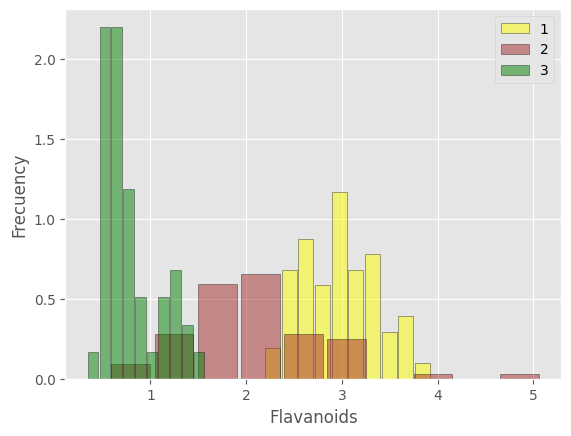

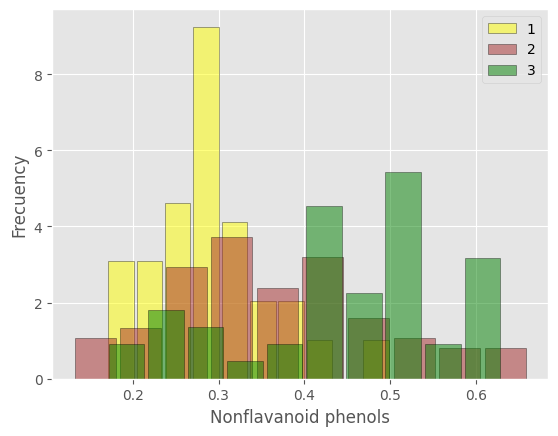

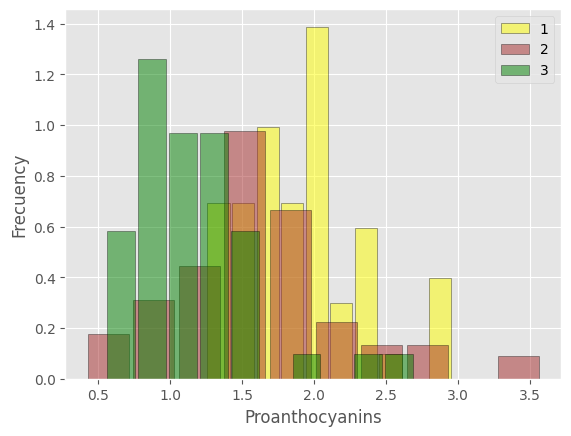

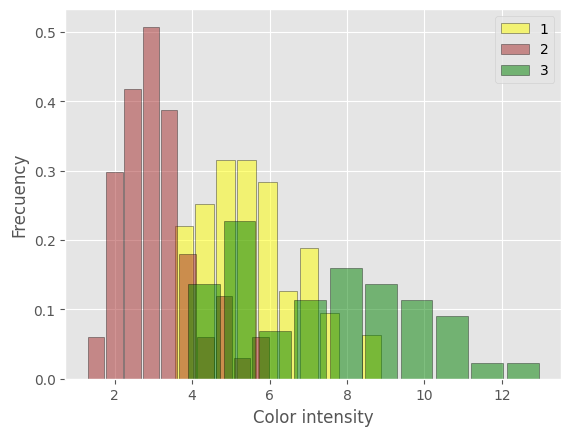

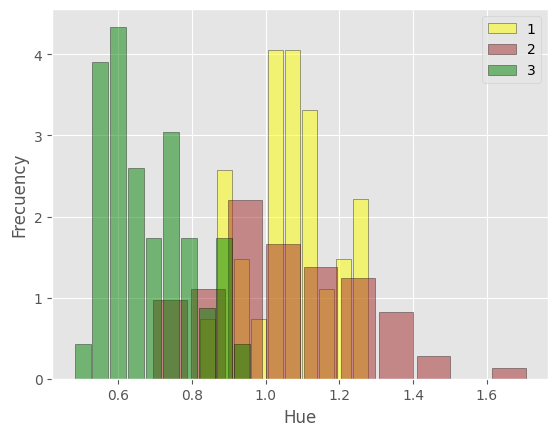

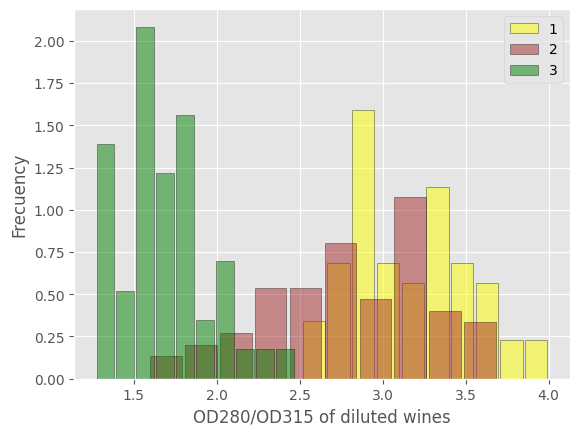

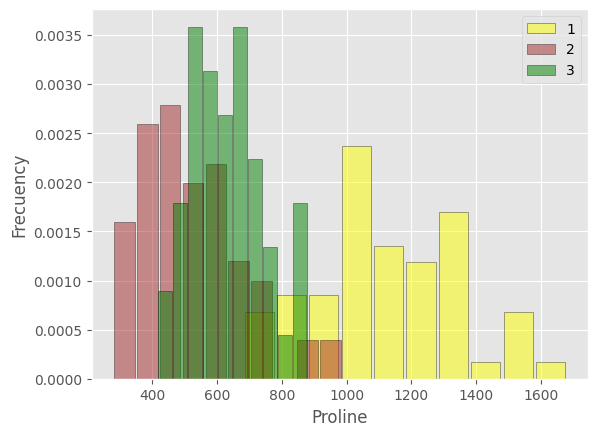

In [ ]:
for class0 in cls[1:]:
    histograms(data = dataset, feature = class0 )
